<a href="https://colab.research.google.com/github/VictorBigoni/composi-o_e_relacionamento/blob/main/dataViz_graficos_composicao_relacionamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

##Paleta de cores
---

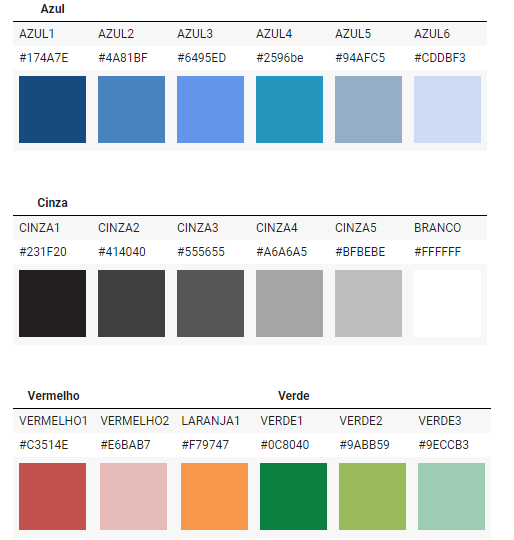

In [ ]:
#Definindo a paleta de cores
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [ ]:
# Importando a base de dados com o PIB dos estados brasileiros de 2002 a 2020
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")

df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [ ]:
#Verificando os dados (tipos e se há valores nulos)
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


##Questionamentos para os dados
---

1. Como está disposto o PIB nos estados brasileiros no ano de 2020? É possível notar os estados com maior e menor participação no PIB nacional?

2. Houve uma significativa mudança na distribuição do PIB por região comparando os valores de 2002 e 2020?

3. Qual a participação do estado de Minas Gerais no PIB de todo o Brasil no ano de 2020?

4. Como está distribuído o PIB do estado da Bahia em 2020 separado por impostos líquidos e os valores adicionados brutos dos bens e serviços produzidos?

5. Qual a evolução anual do PIB do estado do Rio de Janeiro entre os anos de 2010 a 2020?

6. Como está distribuído o PIB nos 3 últimos quinquênios (lustro) dos dados (2010, 2015, 2020) na Região Sul do Brasil divididos pelos estados (Paraná, Santa Catarina e Rio Grande do Sul)?

7. Como estão distribuídos, em porcentagem, os valores adicionados de bens e serviços descritos na base de dados em relação a cada região no ano de 2020?

8. Na agropecuária, como estão distribuídos seus valores adicionados por região dentro do período da base dos dados (2002 - 2020)?

---
####**Pergunta 1 -** Como está disposto o PIB nos estados brasileiros no ano de 2020? É possível notar os estados com maior e menor participação no PIB nacional?

In [ ]:
#Criando um df com os dados desejados
df_pib_2020 = df_pib.copy()
df_pib_2020 = df_pib_2020.query('ano == 2020').set_index('sigla_uf').sort_values('pib', ascending=False)[["pib"]]

df_pib_2020.head()

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


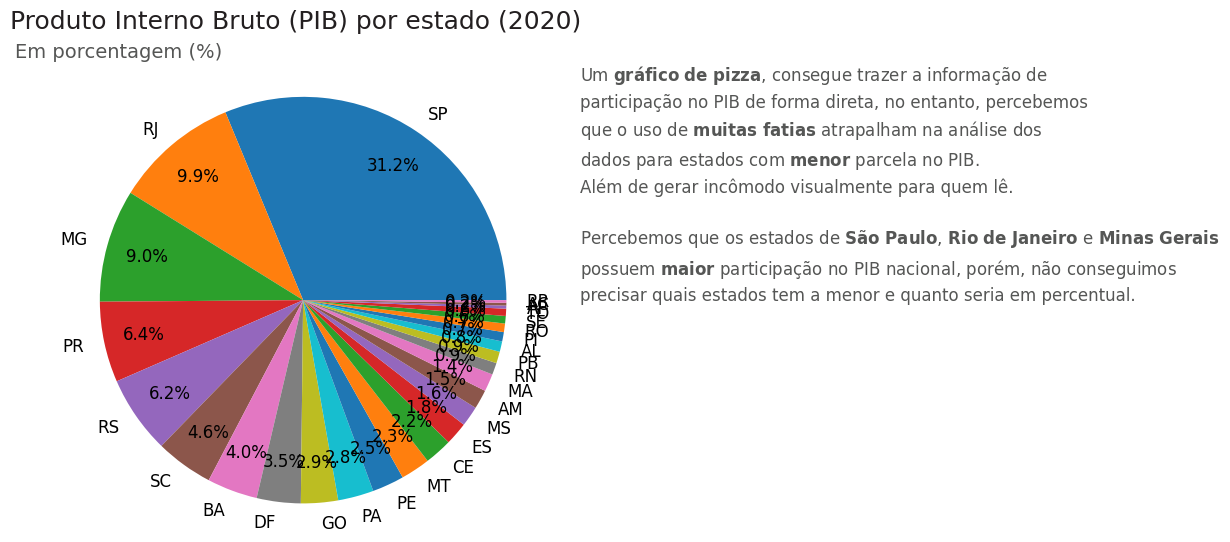

In [ ]:
#Configurando o gráfico

#Área do gráfico
fig, ax = plt.subplots(figsize=(6,6))

#Gerando o gráfico de pizza
ax.pie(data=df_pib_2020, x='pib', labels=df_pib_2020.index, autopct='%.1f%%',
       radius=1.1, pctdistance=0.8, textprops={'size':12})

#Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por estado (2020)', size=18, color=CINZA1)
plt.title('Em porcentagem (%)', fontsize=14, color=CINZA3, pad=15, x=0.1, y=0.98)

# Anotando uma conclusão no gráfico
ax.text(1.1, 0.5,
         'Um $\\bf{gráfico\ de\ pizza}$, consegue trazer a informação de\n'
         'participação no PIB de forma direta, no entanto, percebemos\n'
         'que o uso de $\\bf{muitas\ fatias}$ atrapalham na análise dos\n'
         'dados para estados com $\\bf{menor}$ parcela no PIB.\n'
         'Além de gerar incômodo visualmente para quem lê.\n\n'
         'Percebemos que os estados de $\\bf{São\ Paulo}$, $\\bf{Rio\ de\ Janeiro}$ e $\\bf{Minas\ Gerais}$\n'
         'possuem $\\bf{maior}$ participação no PIB nacional, porém, não conseguimos\n'
         'precisar quais estados tem a menor e quanto seria em percentual.',
         fontsize=12,
         linespacing=1.45,
         color=CINZA3, transform= ax.transAxes)

plt.show()

####**Pergunta 2 -** Houve uma significativa mudança na distribuição do PIB por região comparando os valores de 2002 e 2020?

In [ ]:
#Criando os dfs com os dados desejados
df_pib_2002 = df_pib.query('ano == 2002')[['regiao', 'pib']]
df_pib_2020 = df_pib.query('ano == 2020')[['regiao', 'pib']]

df_pib_2002 = df_pib_2002.groupby('regiao').sum().sort_values('pib', ascending=False)
df_pib_2020 = df_pib_2020.groupby('regiao').sum().sort_values('pib', ascending=False)

display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


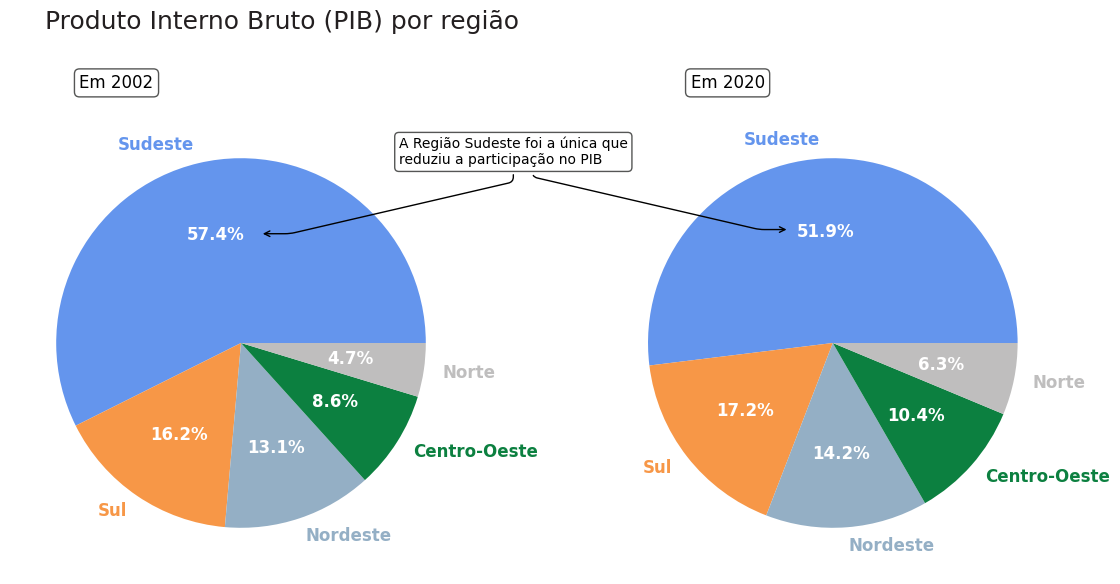

In [ ]:
#Gerando a figura para colocar os dois gráficos
fig, axs = plt.subplots(1, 2, figsize=(14,6))

#Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5, VERDE1, CINZA5]

#Personalizano o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por região', fontsize=18, color=CINZA1, ha='right', x=0.5, y=1.05)

#Gráfico 1 - PIB por região (2002)
ptc, text, _ = axs[0].pie(data=df_pib_2002, x='pib', labels=df_pib_2002.index, autopct='%.1f%%',
                          pctdistance=0.6, textprops={'size': 12, 'fontweight': 'bold', 'color': BRANCO},
                          colors=cores)

#Título do Gráfico 1
axs[0].annotate('Em 2002', xy=(50,350), size=12, xycoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3))

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#Gráfico 2 - PIB por região (2020)
ptc, text, _ = axs[1].pie(data=df_pib_2020, x='pib', labels=df_pib_2020.index, autopct='%.1f%%',
                          pctdistance=0.6, textprops={'size': 12, 'fontweight': 'bold', 'color': BRANCO},
                          colors=cores)

#Título do Gráfico
axs[0].annotate('Em 2020', xy=(490,350), size=12, xycoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3))

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

axs[0].annotate('A Região Sudeste foi a única que\nreduziu a participação no PIB',
                xy=(180,245), xycoords='axes points', xytext=(280,295), textcoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3),
                size=10, arrowprops=dict(arrowstyle='->', fc=CINZA1, connectionstyle='arc, angleA=-90, angleB=0, armA=30, armB=30, rad=5'))

axs[1].annotate('\n\n', xy=(135,248),xycoords='axes points', xytext=(-50,293), textcoords='axes points',
                size=10, arrowprops=dict(arrowstyle='->', fc=CINZA1, connectionstyle='arc, angleA=-90, angleB=0, armA=30, armB=-30, rad=5'))

plt.show()

>Deixamos como desafio a ideia de construir uma visualização para representar os estados de uma região. Que tal testar isto para a região Sul, por exemplo?

In [ ]:
df_pib_sul = df_pib.query('regiao == "Sul"')[['sigla_uf', 'ano', 'pib']]
df_pib_sul

,sigla_uf,ano,pib
380,PR,2002,88235714970
381,PR,2003,110039414399
382,PR,2004,123451529532
383,PR,2005,127464507454
384,PR,2006,137648310679
385,PR,2007,165208890958
386,PR,2008,185683858660
387,PR,2009,196675611941
388,PR,2010,225205254696
389,PR,2011,257122268525


In [ ]:
df_pib_sul_2002 = df_pib_sul.query('ano == 2002')[['sigla_uf', 'pib']].set_index('sigla_uf')
df_pib_sul_2020 = df_pib_sul.query('ano == 2020')[['sigla_uf', 'pib']].set_index('sigla_uf')

display(df_pib_sul_2002, df_pib_sul_2020)

,pib
sigla_uf,
PR,88235714970
SC,54481893216
RS,98847210906


,pib
sigla_uf,
PR,487930593779
SC,349275015538
RS,470941846057


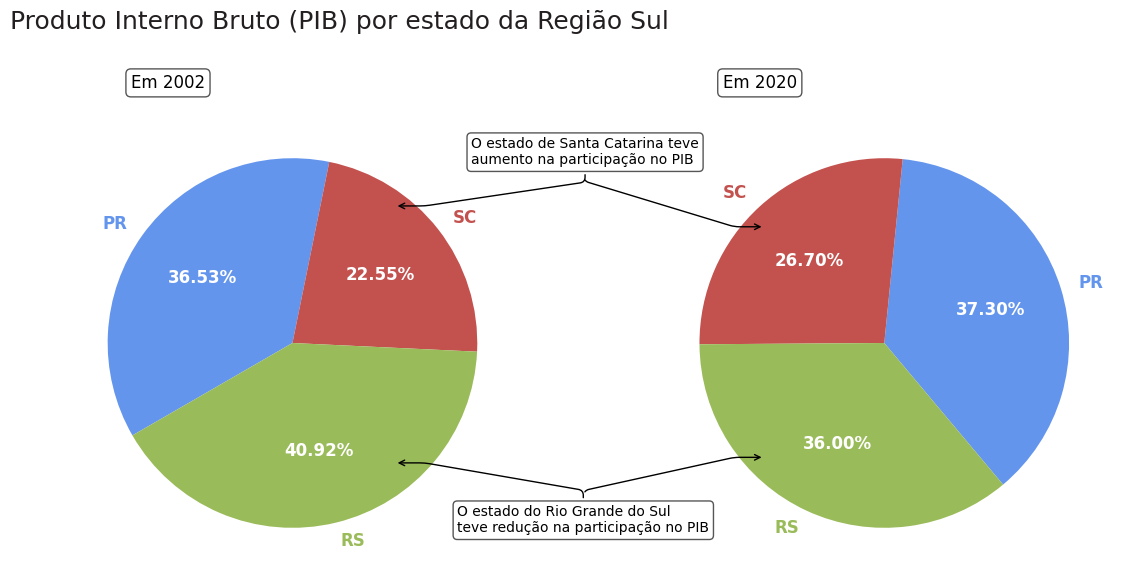

In [ ]:
#Gerando a figura para colocar os dois gráficos
fig, axs = plt.subplots(1, 2, figsize=(14,6))

#Definindo as cores do gráfico
cores = [AZUL3, VERMELHO1, VERDE2]

#Personalizano o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por estado da Região Sul', fontsize=18, color=CINZA1, ha='right', x=0.57, y=1.05)

#Gráfico 1 - PIB por estado na região Sul (2002)
ptc, text, _ = axs[0].pie(data = df_pib_sul_2002, x='pib', labels=df_pib_sul_2002.index, autopct='%.2f%%',
                          pctdistance=0.6, textprops={'size': 12, 'fontweight': 'bold', 'color': BRANCO},
                          colors=cores, counterclock=False, startangle=210)

#Título do Gráfico 1
axs[0].annotate('Em 2002', xy=(50,350), size=12, xycoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3))

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


#Gráfico 2 - PIB por estado na região Sul (2020)
ptc, text, _ = axs[1].pie(data = df_pib_sul_2020, x='pib', labels=df_pib_sul_2020.index, autopct='%.2f%%',
                          pctdistance=0.6, textprops={'size': 12, 'fontweight': 'bold', 'color': BRANCO},
                          colors=cores, startangle=310)

#Título do Gráfico
axs[1].annotate('Em 2020', xy=(50,350), size=12, xycoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3))

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

axs[0].annotate('O estado de Santa Catarina teve\naumento na participação no PIB',
                xy=(240,265), xycoords='axes points', xytext=(295,295), textcoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3),
                size=10, arrowprops=dict(arrowstyle='->', fc=CINZA1, connectionstyle='arc, angleA=-90, angleB=0, armA=30, armB=30, rad=5'))

axs[1].annotate('\n\n', xy=(80,250),xycoords='axes points', xytext=(-50,290), textcoords='axes points',
                size=10, arrowprops=dict(arrowstyle='->', fc=CINZA1, connectionstyle='arc, angleA=-90, angleB=0, armA=30, armB=-30, rad=5'))


axs[0].annotate('O estado do Rio Grande do Sul\nteve redução na participação no PIB',
                xy=(240,80), xycoords='axes points', xytext=(285,30), textcoords='axes points',
                bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3),
                size=10, arrowprops=dict(arrowstyle='->', fc=CINZA1, connectionstyle='arc, angleA=90, angleB=0, armA=30, armB=30, rad=5'))

axs[1].annotate('\n\n', xy=(80,84),xycoords='axes points', xytext=(-49.9,24), textcoords='axes points',
                size=10, arrowprops=dict(arrowstyle='->', fc=CINZA1, connectionstyle='arc, angleA=90, angleB=0, armA=30, armB=-30, rad=5'))

plt.savefig('pib_estados_sul.jpeg')
plt.show()

##Gráfico de rosca
---

####**Pergunta 3 -** Qual a participação do estado de Minas Gerais no PIB de todo o Brasil no ano de 2020?

In [ ]:
#Criando o df com os dados desejados
df_mg_2020 = df_pib.query('ano == 2020')[['sigla_uf', 'pib']]

#Renomeando todos os outros estados como 'Outros' e mudando MG para Minas Gerais
df_mg_2020.loc[df_mg_2020['sigla_uf'] == 'MG', 'sigla_uf'] = 'Minas Gerais'
df_mg_2020.loc[df_mg_2020['sigla_uf'] != 'Minas Gerais', 'sigla_uf'] = 'Outros'

df_mg_2020 = df_mg_2020.groupby('sigla_uf').sum()
df_mg_2020

,pib
sigla_uf,
Minas Gerais,682786116407
Outros,6926810883612


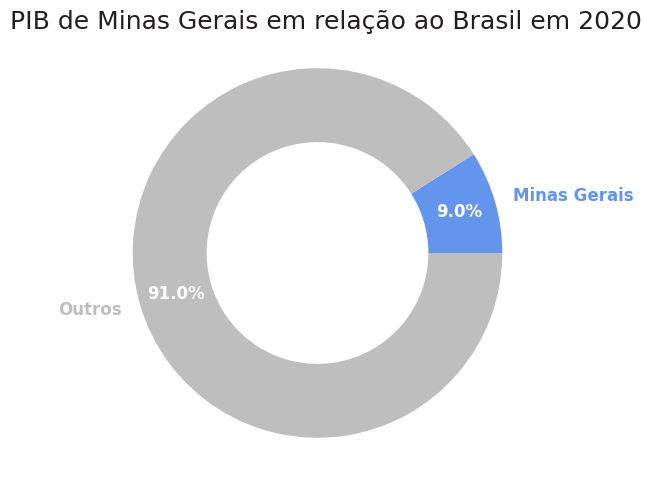

In [ ]:
#Gerando o gráfico de rosca

#Área do gráfico
fig, ax = plt.subplots(figsize=(6,6))

#Definindo as cores do gráfico
cores = [AZUL3, CINZA5]

#Personalizando o gráfico
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha='left', x=0, y=0.9)

#Gerando gráfico do PIB de 2020 de Minas Gerais em relação ao restante do país
ptc, text, _ = ax.pie(data=df_mg_2020, x='pib', labels=df_mg_2020.index, autopct=('%.1f%%'),
                      startangle=0, pctdistance=0.8, wedgeprops=dict(width=0.4),
                      textprops=dict(size=12, fontweight='bold', color=BRANCO),
                      colors=cores)

#Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

####**Pergunta 4 -** Como está distribuído o PIB do estado da Bahia em 2020 separado por impostos líquidos e os valores adicionados brutos dos bens e serviços produzidos?

In [ ]:
bahia = df_pib.query('sigla_uf == "BA" and ano == 2020')[['pib', 'impostos_liquidos', 'va']]
bahia.rename(columns={'pib':'PIB', 'impostos_liquidos':"Impostos Líquidos", 'va':"Valor Adicionado Bruto"}, inplace=True)
bahia

,PIB,Impostos Líquidos,Valor Adicionado Bruto
303,305320812691,37094030606,268226782074


In [ ]:
#Criando um df com os dados desejados
bahia = bahia.melt(var_name='Indicadores', value_name='Valores')

bahia

,Indicadores,Valores
0,PIB,305320812691
1,Impostos Líquidos,37094030606
2,Valor Adicionado Bruto,268226782074


In [ ]:
#Alterando os impostos para decréscimo, criando uma coluna com os valores em string e outra com as medidas
bahia.loc[bahia['Indicadores'] == 'Impostos Líquidos', 'Valores'] = bahia['Valores'] * -1
bahia['Valores_str'] = (bahia['Valores']/1e9).map('R$ {:,.2f} Bi'.format)
bahia['Medidas'] = ['absolute', 'relative', 'total']


bahia

,Indicadores,Valores,Valores_str,Medidas
0,PIB,305320812691,R$ 305.32 Bi,absolute
1,Impostos Líquidos,-37094030606,R$ -37.09 Bi,relative
2,Valor Adicionado Bruto,268226782074,R$ 268.23 Bi,total


##Gráfico de cascata
---

In [ ]:
#importando a biblioteca go
import plotly.graph_objects as go

#Gerando o gráfico de cascata
fig = go.Figure(go.Waterfall(name='', orientation='v', measure=bahia['Medidas'],
                             x=bahia['Indicadores'], y=bahia['Valores'],
                             text=bahia['Valores_str'], textposition='outside',
                             connector_line=dict(color=CINZA3),
                             totals_marker=dict(color=AZUL3),
                             decreasing_marker=dict(color=VERMELHO1)
                             )
)

#Personalizando o gráfico
fig.update_layout(width=1000, height=500, font_family='DejaVu Sans', font_size=15,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) da Bahia em 2020' +
                              '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l=50, plot_bgcolor=BRANCO, yaxis_range=[0,380e9], hovermode='closest')

#Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

#Dados ao passar o mouse
fig.update_traces(hovertemplate="<b>%{x}</b> = %{text}")

#Adicionando a fonte de dados
fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align='left', xref='paper', yref='paper', x=1, y=-0.2, showarrow=False)

fig.write_html("pib_bahia.html")
fig.show()

####**Pergunta 5 -** Qual a evolução anual do PIB do estado do Rio de Janeiro entre os anos de 2010 a 2020?

In [ ]:
#Selecionando os dados do Rio de Janeiro
anos = [x for x in range(2010, 2021)]
rio = df_pib.query('sigla_uf =="RJ" and ano == @anos')[['ano', 'pib']]
rio = rio.reset_index(drop=True)
rio

,ano,pib
0,2010,449858101109
1,2011,512767904769
2,2012,574884973130
3,2013,628226069362
4,2014,671076844311
5,2015,659138951833
6,2016,640401206447
7,2017,671605668055
8,2018,758859046865
9,2019,779927917084


In [ ]:
#Gerando uma coluna com a variação do pib e passando o valor do PIB inicial para a primeira linha
rio['variacao_pib'] = rio['pib'].diff().fillna(rio['pib']).astype('int64')

#Gerando uma coluna com as mediads para o gráfico de cascata
rio['Medidas'] =['absolute'] + ['relative'] * 10

rio.head()

,ano,pib,variacao_pib,Medidas
0,2010,449858101109,449858101109,absolute
1,2011,512767904769,62909803660,relative
2,2012,574884973130,62117068361,relative
3,2013,628226069362,53341096232,relative
4,2014,671076844311,42850774949,relative


In [ ]:
#Gerando uma observação com a atuaização da última linha com o PIB total de 2020
atualizacao = pd.Series({'ano': 'Total',
                         'pib': rio['pib'].values[-1],
                         'variacao_pib': rio['pib'].values[-1],
                         'Medidas': 'total'}).to_frame().T

#Concatenando o df com a atualiza~~ao e retirando a coluna pib
rio = pd.concat([rio, atualizacao], axis=0, ignore_index=True)
rio = rio.drop(columns=['pib'])

#Ajustando a formatação do PIB e renomeando colunas
rio['variacao_pib_texto'] = (rio['variacao_pib']/1e9).map('R$ {:,.2f} Bi'.format)
rio.rename(columns={'ano':'Ano', 'variacao_pib':'Variação do PIB', 'variacao_pib_texto':'Variação do PIB (em texto)'}, inplace=True)
rio

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,449858101109,absolute,R$ 449.86 Bi
1,2011,62909803660,relative,R$ 62.91 Bi
2,2012,62117068361,relative,R$ 62.12 Bi
3,2013,53341096232,relative,R$ 53.34 Bi
4,2014,42850774949,relative,R$ 42.85 Bi
5,2015,-11937892478,relative,R$ -11.94 Bi
6,2016,-18737745386,relative,R$ -18.74 Bi
7,2017,31204461608,relative,R$ 31.20 Bi
8,2018,87253378810,relative,R$ 87.25 Bi
9,2019,21068870219,relative,R$ 21.07 Bi


In [ ]:
#Gerando o gráfico de cascata

fig = go.Figure(
                go.Waterfall(name='', orientation='v', measure=rio['Medidas'],
                             y=rio['Variação do PIB'], text=rio['Variação do PIB (em texto)'],
                             textposition='outside',
                             connector_line=dict(color=CINZA3),
                             totals_marker=dict(color=AZUL3),
                             increasing_marker=dict(color=VERDE1),
                             decreasing_marker=dict(color=VERMELHO1)
                             )
                )

#Personalizando o gráfico
fig.update_layout(width=1200, height=600, font_family='DejaVu Sans', font_size=15,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) do Rio de Janeiro' +
                  '<br><sup size=1 style="color:#555655">De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor=BRANCO, yaxis_range=[0,850e9])

#Retirando os ticks do eico y
fig.update_yaxes(showticklabels=False)

#Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=rio['Ano'])

#Dados ao passar o mouse
fig.update_traces(hovertemplate="<b>%{x}</b> = %{text}")

#Anotações
fig.add_annotation(text='O <b>Rio de Janeiro</b> apresentou recuo no PIB<br>em pelo menos 3 anos no período:<br>2015, 2016 e 2020',
                  align='left', axref='x', ayref='y', x=5, y=600e9, ax=8, ay=450e9,
                  arrowhead=1, arrowside='start', showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                  bordercolor=CINZA3, borderwidth=1, borderpad=4)

fig.add_annotation(text='', axref='x', ayref='y', x=6, y=600e9, ax=8, ay=530e9,
                   arrowhead=1, arrowside='start', showarrow=True, arrowwidth=2, arrowcolor=CINZA3)

fig.add_annotation(text='', axref='x', ayref='y', x=10, y=710e9, ax=8.5, ay=530e9,
                   arrowhead=1, arrowside='start', showarrow=True, arrowwidth=2, arrowcolor=CINZA3)

fig.write_html('variacao_pib_rio_de_janeiro.html')
fig.show()

###Desafio: construir um gráfico de cascata para o seu estado!



In [ ]:
#Selecionando os dados para SP
anos = [x for x in range(2010, 2021)]
sao_paulo = df_pib.query('sigla_uf == "SP" and ano == @anos')[['ano', 'pib']]
sao_paulo = sao_paulo.reset_index(drop=True)
sao_paulo

,ano,pib
0,2010,1294695988452
1,2011,1436672709019
2,2012,1559033443696
3,2013,1715238416566
4,2014,1858196055494
5,2015,1939901907118
6,2016,2038757381630
7,2017,2120761635108
8,2018,2210561949467
9,2019,2348338000290


In [ ]:
#Gerando uma coluna com a variação do pib e passando o valor do PIB inicial para a primeira linha
sao_paulo['variacao_pib'] = sao_paulo['pib'].diff().fillna(sao_paulo['pib']).astype('int64')

#Gerando uma coluna com as mediads para o gráfico de cascata
sao_paulo['Medidas'] =['absolute'] + ['relative'] * 10

sao_paulo.head()

,ano,pib,variacao_pib,Medidas
0,2010,1294695988452,1294695988452,absolute
1,2011,1436672709019,141976720567,relative
2,2012,1559033443696,122360734677,relative
3,2013,1715238416566,156204972870,relative
4,2014,1858196055494,142957638928,relative


In [ ]:
#Gerando uma observação com a atualização da última linha com o PIB total de 2020
atualizacao = pd.Series({'ano': 'Total',
                         'pib': sao_paulo['pib'].values[-1],
                         'variacao_pib': sao_paulo['pib'].values[-1],
                         'Medidas': 'total'}).to_frame().T

#Concatenando o df com a atualiza~~ao e retirando a coluna pib
sao_paulo = pd.concat([sao_paulo, atualizacao], axis=0, ignore_index=True)
sao_paulo = sao_paulo.drop(columns=['pib'])

#Ajustando a formatação do PIB e renomeando colunas
sao_paulo['variacao_pib_texto'] = (sao_paulo['variacao_pib']/1e9).map('R$ {:,.2f} Bi'.format)
sao_paulo.rename(columns={'ano':'Ano', 'variacao_pib':'Variação do PIB', 'variacao_pib_texto':'Variação do PIB (em texto)'}, inplace=True)
sao_paulo

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,1294695988452,absolute,"R$ 1,294.70 Bi"
1,2011,141976720567,relative,R$ 141.98 Bi
2,2012,122360734677,relative,R$ 122.36 Bi
3,2013,156204972870,relative,R$ 156.20 Bi
4,2014,142957638928,relative,R$ 142.96 Bi
5,2015,81705851624,relative,R$ 81.71 Bi
6,2016,98855474512,relative,R$ 98.86 Bi
7,2017,82004253478,relative,R$ 82.00 Bi
8,2018,89800314359,relative,R$ 89.80 Bi
9,2019,137776050823,relative,R$ 137.78 Bi


In [ ]:
#Gerando o gráfico de cascata

fig = go.Figure(
                go.Waterfall(name='', orientation='v', measure=sao_paulo['Medidas'],
                             y=sao_paulo['Variação do PIB'], text=sao_paulo['Variação do PIB (em texto)'],
                             textposition='outside',
                             connector_line=dict(color=CINZA3),
                             totals_marker=dict(color=AZUL3),
                             increasing_marker=dict(color=VERDE1),
                             decreasing_marker=dict(color=VERMELHO1)
                             )
                )

#Personalizando o gráfico
fig.update_layout(width=1200, height=600, font_family='DejaVu Sans', font_size=15,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) ds São Paulo' +
                  '<br><sup size=1 style="color:#555655>De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor=BRANCO, yaxis_range=[0,260e10])

#Retirando os ticks do eico y
fig.update_yaxes(showticklabels=False)

#Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=rio['Ano'])

#Dados ao passar o mouse
fig.update_traces(hovertemplate="<b>%{x}</b> = %{text}")

#Anotações
fig.add_annotation(text='<b>São Paulo</b> apresentou crescimento contínuo<br>no PIB no período apresentado.',
                  align='left', axref='x', ayref='y', x=7, y=900e9, ax=8, ay=450e9,
                  showarrow=False, bordercolor=CINZA3, borderwidth=1, borderpad=4)

fig.write_html('varicao_pib_sao_paulo.html')
fig.show()

####**Pergunta 6 -** Como está distribuído o PIB nos 3 últimos quinquênios (lustro) dos dados (2010, 2015, 2020) na Região Sul do Brasil divididos pelos estados (Paraná, Santa Catarina e Rio Grande do Sul)?

In [ ]:
#Selecionando os dados da região Sul do Brasil
anos = [x for x in range(2010, 2021, 5)]
pib_sul = df_pib.query('regiao == "Sul" and ano == @anos')[['ano', 'sigla_uf', 'pib']]
pib_sul['pib'] = (pib_sul['pib']/1e9).round(2)
pib_sul = pib_sul.reset_index(drop=True)
pib_sul

,ano,sigla_uf,pib
0,2010,PR,225.21
1,2015,PR,376.96
2,2020,PR,487.93
3,2010,SC,153.73
4,2015,SC,249.08
5,2020,SC,349.28
6,2010,RS,241.25
7,2015,RS,381.99
8,2020,RS,470.94


In [ ]:
#Criando uma tabela cruzada com os valores de venda de cada ano por região
pib_sul_cross = pd.crosstab(index=pib_sul.ano, columns=pib_sul.sigla_uf,
                            values=pib_sul.pib, aggfunc='sum', normalize="index")
pib_sul_cross = pib_sul_cross.reset_index()
pib_sul_cross

sigla_uf,ano,PR,RS,SC
0,2010,0.363131,0.388994,0.247876
1,2015,0.373957,0.378947,0.247096
2,2020,0.372992,0.360005,0.267003


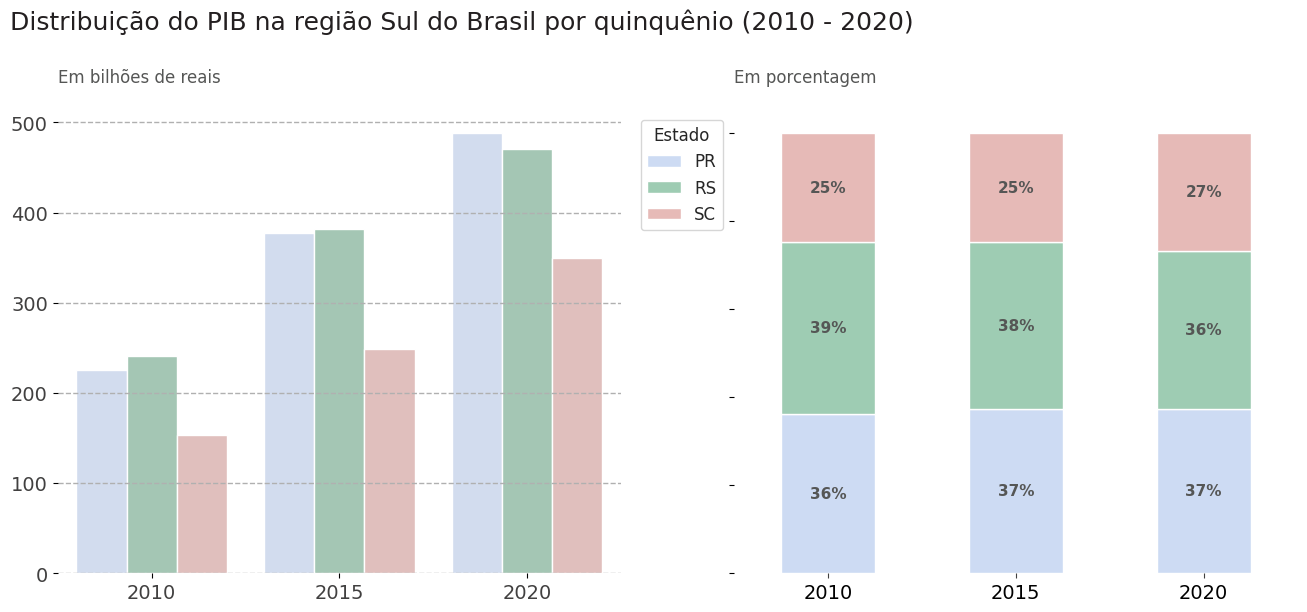

In [ ]:
#Gerando o gráfico

#Área do gráfico e tema de visualização
fig, axs = plt.subplots(1,2,figsize=(16,6))
sns.set_theme(style='white')

#Definindo as cores do gráfico
cores = [AZUL6, VERDE3, VERMELHO2]

#Personalizando o título superior
fig.suptitle('Distribuição do PIB na região Sul do Brasil por quinquênio (2010 - 2020)',
             fontsize=18, color=CINZA1, ha='right', x=0.66, y=1.05)

#Gráfico 1 - Gráfico de colunas agrupadas
sns.barplot(data=pib_sul, x='ano', y='pib', hue='sigla_uf', hue_order=['PR', 'RS', 'SC'],
            ax = axs[0], palette=cores)

axs[0].set_title('Em bilhões de reais\n', color=CINZA3, loc='left')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
axs[0].yaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
axs[0].set_frame_on(False)
axs[0].legend().remove()
axs[0].yaxis.grid(linestyle='--', linewidth=1)

#Gráfico 2 - Gráfico de colunas empilhads 100%
pib_sul_cross.plot(x='ano', kind='bar', stacked=True, ax=axs[1], color=cores)

axs[1].set_title('Em porcentagem\n', color=CINZA3, loc='left')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].xaxis.set_tick_params(labelsize=14, color=CINZA2, labelrotation=0)
axs[1].set_yticklabels([])
axs[1].set_frame_on(False)

#Adicionando a legenda entre os dois gráficos
axs[1].legend(bbox_to_anchor=(-0.005,1), title='Estado', title_fontsize=12, fontsize=12)

#Adicionando os valores dentro das colunas
for container in axs[1].containers:
  labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
  axs[1].bar_label(container, label_type='center', labels=labels, size=11, color=CINZA3, fontweight='bold')

plt.show()

##Gráfico de barras empilhadas
---

####**Pergunta 7 -** Como estão distribuídos, em porcentagem, os valores adicionados de bens e serviços descritos na base de dados em relação a cada região no ano de 2020?

In [ ]:
#Selecionando os dados
df_va_separado = df_pib.query('ano == 2020')[['regiao', 'va_servicos', 'va_industria', 'va_adespss', 'va_agropecuaria']]
df_va_separado = df_va_separado.reset_index(drop=True)
df_va_separado.head()

,regiao,va_servicos,va_industria,va_adespss,va_agropecuaria
0,Norte,19060688172,8285675423,12000339417,6891411669
1,Norte,6590543336,1191345379,6031050521,983531817
2,Norte,34795836262,35839810630,20210620577,5114449144
3,Norte,5278754961,1706511471,6538065265,1000907462
4,Norte,56395092425,84173852308,37614037902,19730656823


In [ ]:
#Agrupando os dados por região
df_va_separado = df_va_separado.groupby('regiao').agg('sum')

#Normalizando os dados por região
df_va_separado = df_va_separado.div(df_va_separado.sum(axis=1), axis=0)
df_va_separado = df_va_separado.sort_values(by='va_servicos', axis=0)

df_va_separado

,va_servicos,va_industria,va_adespss,va_agropecuaria
regiao,,,,
Norte,0.338521,0.323217,0.239485,0.098777
Centro-Oeste,0.435471,0.153645,0.266185,0.144699
Nordeste,0.459790,0.191011,0.260121,0.089078
Sul,0.508060,0.252751,0.139648,0.099541
Sudeste,0.610871,0.228032,0.133536,0.027561


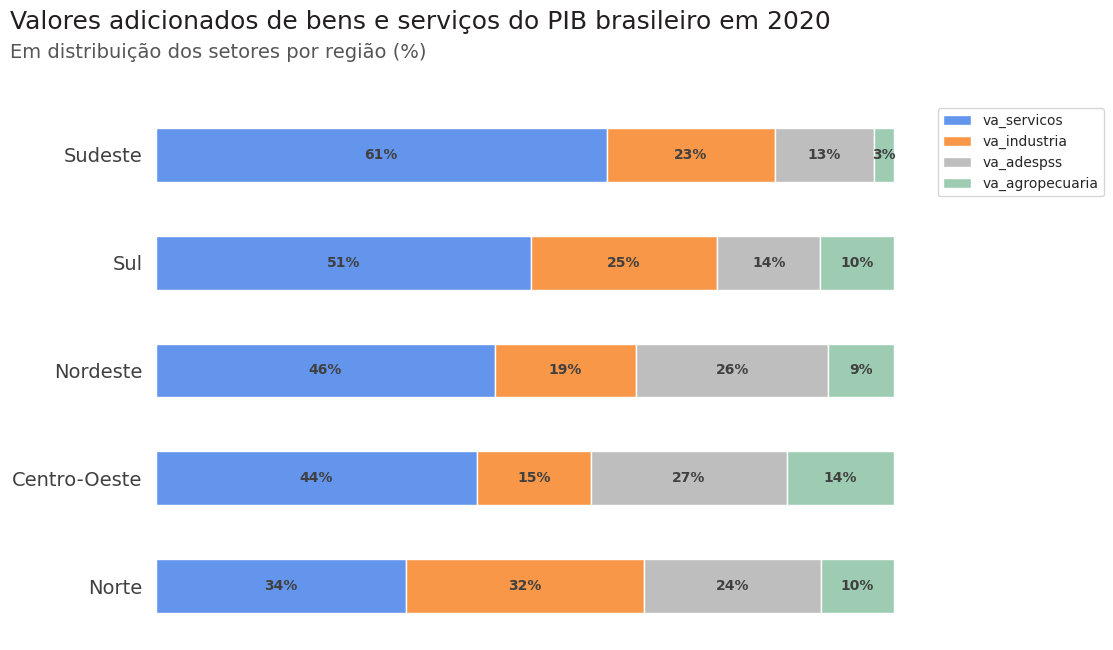

In [ ]:
#Gerando uma função para criar o gráfico

def grafico_va():

  #Área do gráfico
  fig, ax = plt.subplots(figsize=(10,7))

  #Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

  #Gerando o gráfico de barras empilhadas 100%
  df_va_separado.plot(kind='barh', stacked=True, color=cores, ax=ax)

  #Personalizando o gráfico
  plt.suptitle('Valores adicionados de bens e serviços do PIB brasileiro em 2020', size=18, color=CINZA1,
               ha='right', x=0.8, y=1.01)
  plt.title('Em distribuição dos setores por região (%)\n', fontsize=14, color=CINZA3, pad=15, ha='right', x=0.35)
  ax.legend(bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, fontsize= 10, loc='upper left')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
  ax.set_frame_on(False)

  #Valores das barras
  for container in ax.containers:
    labels = [f'{valor.get_width()*100:.0f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels=labels, size=10, color=CINZA2, fontweight='bold')

  return ax, cores

ax, cores = grafico_va()

In [ ]:
from matplotlib import transforms

#Função para colorir o texto
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

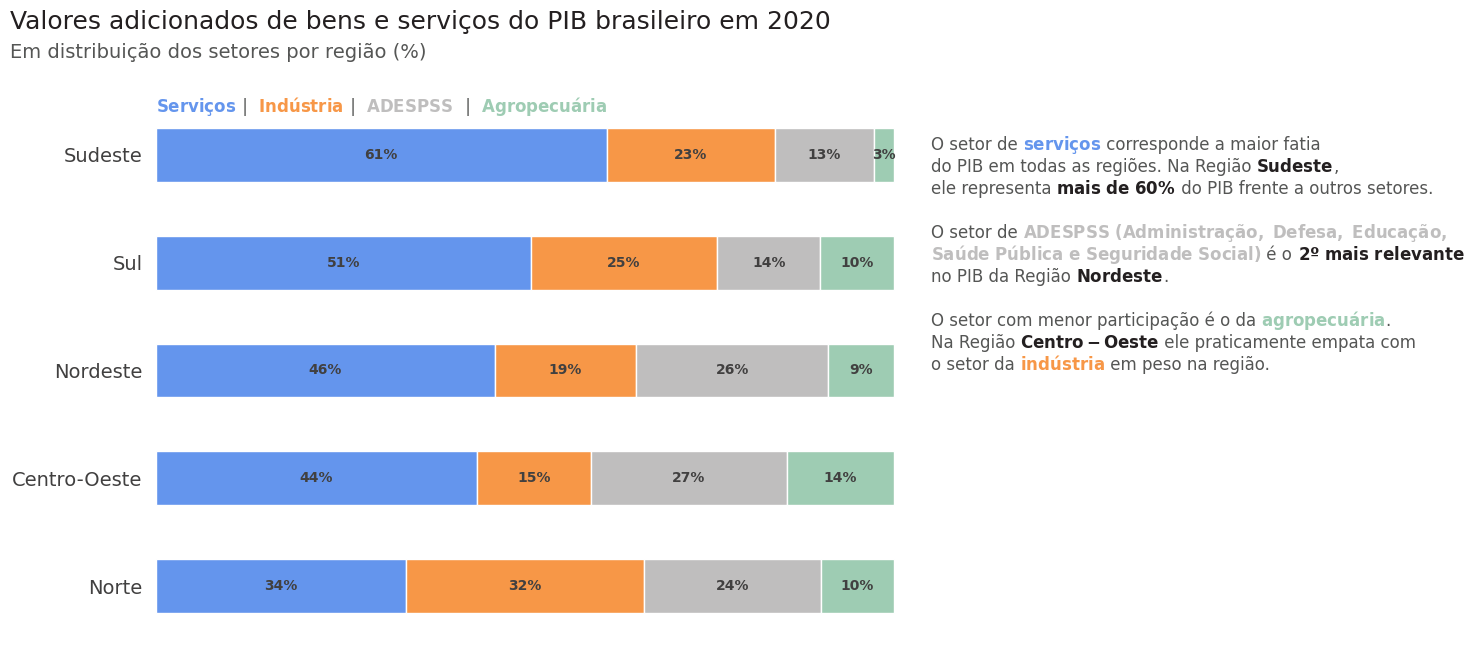

In [ ]:
#Gerando o gráfico de barras empilhadas e salvando as cores que vamos utilizar no texto
ax, cores = grafico_va()

#Trabalhando com o texto colorido para legenda e anotações
#Legenda das barras
ax.legend().remove()
texto_colorido(0, 4.4, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$  || | || $\\bf{Agropecuária}$',
               cores=[[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)


# Anotando uma conclusão no gráfico
texto_colorido(
    1.05, 2,                                                             # coordenadas
    'O setor de ||$\\bf{serviços}$|| corresponde a maior fatia\n'        # texto
    'do PIB em todas as regiões. Na Região ||$\\bf{Sudeste}$||,\n'
    'ele representa ||$\\bf{mais\ de\ 60\%}$|| do PIB frente a outros setores.\n'
    '\n'
    'O setor de ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$|| é o ||$\\bf{2º\ mais\ relevante}$||\n'
    'no PIB da Região ||$\\bf{Nordeste}$||.\n'
    '\n'
    'O setor com menor participação é o da ||$\\bf{agropecuária}$||.\n'
    'Na Região ||$\\bf{Centro-Oeste}$|| ele praticamente empata com\n'
    'o setor da ||$\\bf{indústria}$|| em peso na região.',
    [[CINZA3, AZUL3, CINZA3],         # linha 1                          # cores
     [CINZA3, CINZA1, CINZA3],        # linha 2
     [CINZA3, CINZA1, CINZA3],        # linha 3
     [CINZA3],                        # linha 4
     [CINZA3, CINZA5],                # linha 5
     [CINZA5, CINZA3, CINZA1],        # linha 6
     [CINZA3, CINZA1, CINZA3],        # linha 7
     [CINZA3],                        # linha 8
     [CINZA3, VERDE3, CINZA3],        # linha 9
     [CINZA3, CINZA1, CINZA3],        # linha 10
     [CINZA3, LARANJA1, CINZA3]       # linha 11
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

fig.show()

##Gráfico de área
---

####**Pergunta 8 -** Na agropecuária, como estão distribuídos seus valores adicionados por região dentro do período da base dos dados (2002 - 2020)?

In [ ]:
#Selecionando os dados
df_agro = df_pib.copy()
df_agro = df_agro[['regiao', 'ano', 'va_agropecuaria']]

#Agrupando os dados por regiao
df_agro = pd.crosstab(index=df_agro.ano, columns=df_agro.regiao,
                      values=df_agro.va_agropecuaria, aggfunc='sum')
df_agro = (df_agro/1e9).round(2)

df_agro.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,12.98,17.04,6.40,22.57,22.53
2003,18.70,20.98,8.14,25.71,32.42
2004,20.98,22.44,8.18,28.27,31.05
2005,17.04,22.03,8.53,28.99,24.37
2006,12.15,23.42,8.91,34.44,26.37


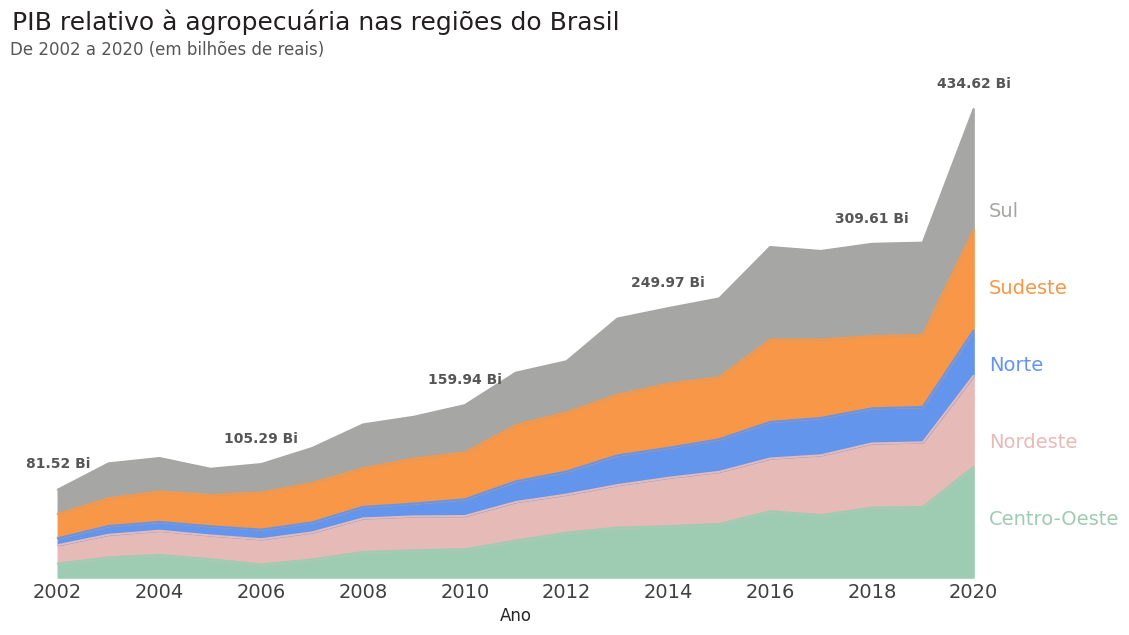

In [ ]:
#Gerando o gráfico
fig, ax = plt.subplots(figsize=(13,7))

#Definindo as cores do gráfico
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

#Gerando o gráfico de áreas empilhadas
df_agro.plot(kind='area', stacked=True, color=cores, ax=ax, xticks=range(2002, 2021, 2))

#Personalizando o gráfico
ax.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize=18, color=CINZA1, loc='left')
ax.text(0.31, 0.98, 'De 2002 a 2020 (em bilhões de reais)', transform=ax.transAxes, color=CINZA3, fontsize=12,
        ha='right', va='center')
ax.set_ylabel('')
ax.set_xlabel('Ano')
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
ax.legend().remove()
ax.set_frame_on(False)

#anotando os nomes das regiões
reg = list(reversed(df_agro.columns))
cor = list(reversed(cores))
for i in range(len(reg)):
  ax.text(0.97, (0.67 - i/7), f'{reg[i]}', fontsize=14, color=cor[i], transform=ax.transAxes)

#Ajustes no eixo y
#Descrevendo o lmites mínimo e máximo do eixo y e escondendo o eixo
plt.ylim(0,500)
ax.get_yaxis().set_visible(False)

#Removendo todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

#Destacando os valores de 4 em 4 anos e no ano de 2020
agregado_ano = list(df_agro.sum(axis=1).round(2))
for i in range(0, len(df_agro.index), 4):
  ax.text(x=df_agro.index[i], y=agregado_ano[i] + 20, s=f'{agregado_ano[i]} Bi', color=CINZA3, weight='bold', fontsize=10, ha='center')
ax.text(x=df_agro.index[-1], y=agregado_ano[-1] + 20, s=f'{agregado_ano[-1]} Bi', color=CINZA3, weight='bold', fontsize=10, ha='center')

plt.show()

##Gráfico de inclinação
---

In [ ]:
df_agro_slope = df_pib.query('ano == [2002,2020]')[['regiao', 'ano', 'va_agropecuaria']]

#Agrupando os dados por regiao
df_agro_slope = pd.crosstab(index=df_agro_slope.ano, columns = df_agro_slope.regiao,
                            values = df_agro_slope.va_agropecuaria, aggfunc='sum', normalize='index')

df_agro_slope = (df_agro_slope*100).round(1)

df_agro_slope.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,15.9,20.9,7.9,27.7,27.6
2020,23.6,19.4,9.7,21.5,25.8


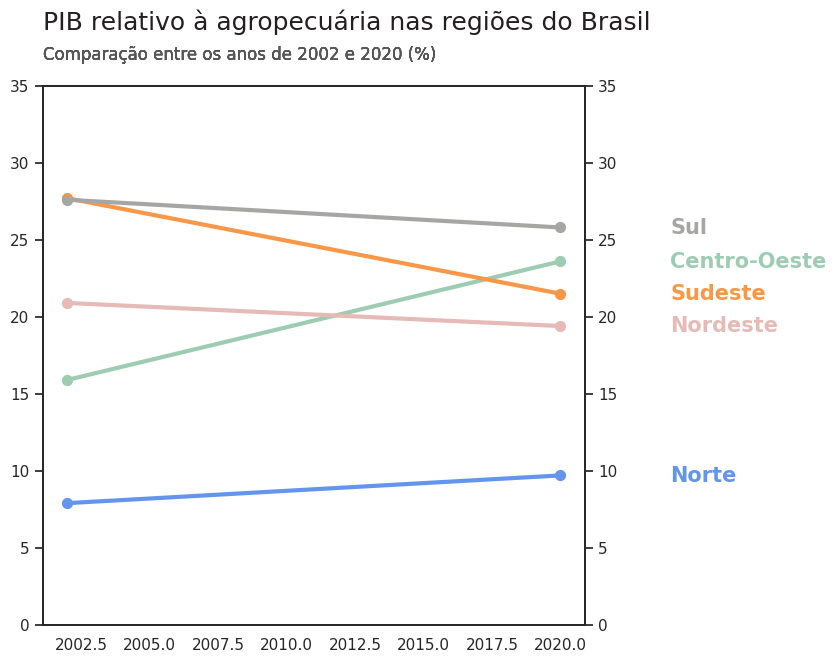

In [ ]:
#Gerando a função para criar o gráfico

def grafico_slope_agro():
  fig, ax1 = plt.subplots(figsize=(7,7))

  #Definindo as cores do gráfico
  cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

  ax2 = ax1.twinx()
  ax1.set_ylim([0,35])
  ax2.set_ylim([0,35])

  #Gerando o gráfico de inclinhação (pontos + curvas + texto)
  for i in range(5):
    #Adicionando o ponto inicial e final
    ax1.scatter(x=df_agro_slope.index, y=df_agro_slope.iloc[:,i], color=cores[i], s=50)

    #Adicionando a inclinação
    ax1.plot(df_agro_slope.index, df_agro_slope.iloc[:,i], color=cores[i], lw=3)

    #Adicionando as regiões no label
    ax1.text(x=2024, y=df_agro_slope.iloc[-1,i], s=df_agro_slope.columns[i],
             fontsize=15, fontweight='bold', linespacing=1.5, color=cores[i], va='center')

    #Personalizando o gráfico
    ax1.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize=18, color=CINZA1, loc='left', pad=40)
    ax1.text(0, 1.058, 'Comparação entre os anos de 2002 e 2020 (%)', transform=ax1.transAxes,
             color=CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_agro()

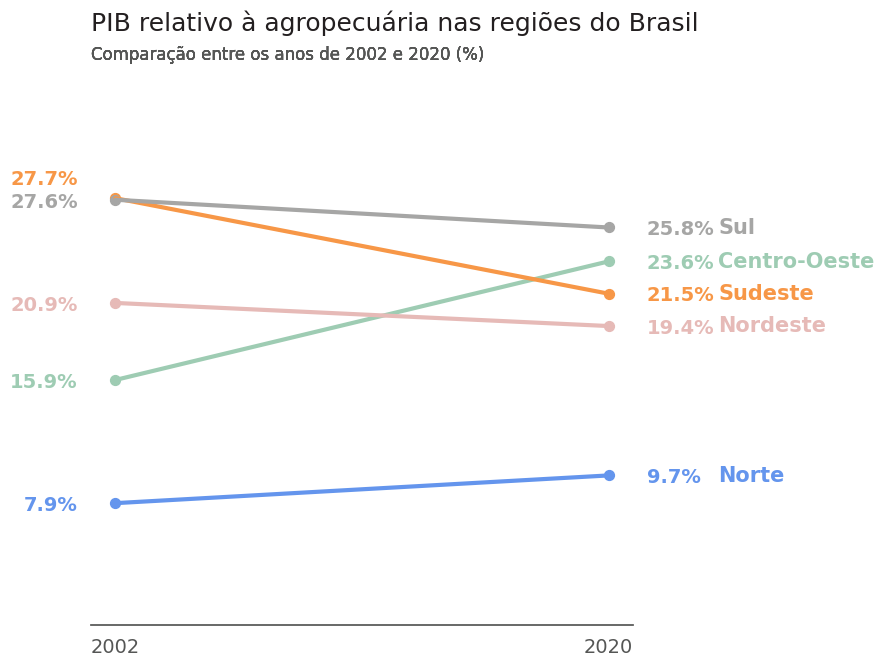

In [ ]:
#Estilizando o gráfico
#Chamando a função

ax1, ax2, cores = grafico_slope_agro()

#Retirando os ticks do eixo y de ambos os lados e as bordas exceto a da base
ax1.tick_params(left=False)
ax1.spines[['top', 'left', 'right']].set_visible(False)
ax2.tick_params(right=False)
ax2.set_frame_on(False)

#Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2002, 2020], xticklabels=['2002', '2020'],
         yticks=df_agro_slope.iloc[0,:],
         yticklabels=[f'{str(valor)}%' if i!=3 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_agro_slope.iloc[0,:])]
         )

#Ajustando as propriedades do eixo y da esquerda
plt.setp(ax2, yticks=df_agro_slope.iloc[1,:],
         yticklabels=[f'{str(valor)}%' for i, valor in enumerate(df_agro_slope.iloc[1,:])]
         )

#Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

#Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()

##Relacionando dados
---
###Apresentando a base de dados

####Situação-problema 2
Nesta situação-problema, você recebeu um conjunto de dados para analisar as notas do IDEB, divididas por região, das provas realizadas entre 2005 e 2021. Os dados descrevem o desempenho dos alunos em testes de língue portuguesa e matemática, além da taxa de aprovação escolar.

O IDEB é medido em uma escala de 0 a 10 e é importante ferramenta para acompanhar o desenvolvimento da educação básica no país, permitindo a avaliação da efetividade das políticas públicas na área e a identificação das regiões que necessitam de maior atenção.

Aqui, vamos focar em investigar as notas em diferentes níveis de ensino (Ensino Fundamental Anos Iniciais e Anos Finais e Ensino Médio) tecendo alguns comentários a respeito das perguntas levantadas.

In [ ]:
# Importando o conjunto de dados com os dados do IDEB nacional de provas realizadas de 2005 a 2021
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

ideb.head(6)

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2005,Centro-Oeste,estadual,fundamental,EFAF,72.1,0.721828,233.50,227.88,4.356453,3.1
1,2005,Centro-Oeste,estadual,fundamental,EFAI,83.0,0.837081,185.38,172.13,4.631618,3.9
2,2005,Centro-Oeste,estadual,medio,EM,68.0,0.695138,261.23,251.52,4.123654,2.9
3,2005,Centro-Oeste,privada,fundamental,EFAF,94.4,0.943491,283.57,266.82,5.840183,5.5
4,2005,Centro-Oeste,privada,fundamental,EFAI,97.3,0.972388,223.64,210.36,6.057024,5.9
5,2005,Centro-Oeste,privada,medio,EM,92.4,0.943179,338.52,309.85,6.082840,5.7


In [ ]:
# Verificando os tipos de dados e checando nulos
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          270 non-null    int64  
 1   regiao                       270 non-null    object 
 2   rede                         270 non-null    object 
 3   ensino                       270 non-null    object 
 4   anos_escolares               270 non-null    object 
 5   taxa_aprovacao               270 non-null    float64
 6   indicador_rendimento         270 non-null    float64
 7   nota_saeb_matematica         270 non-null    float64
 8   nota_saeb_lingua_portuguesa  270 non-null    float64
 9   nota_saeb_media_padronizada  270 non-null    float64
 10  ideb                         270 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 23.3+ KB


###**Questionamentos**

1.   Qual a relação entre o IDEB e o indicador de rendimento das escolas no ensino médio? É positiva, negativa ou não estão correlacionadas?
2.   Qual a relação entre as notas das disciplinas de língua portuguesa e matemática no SAEB por região no Ensino Fundamental Anos Iniciais? Conseguimos traçar algum paralelo entre elas?
3.  Qual seria a relação entre a taxa de aprovação e a média da nota do SAEB no Ensino Fundamental Anos Finais? Conseguimos notas como as duas se distribuem em relação ao IDEB e as regiões?
---


###Questionamento 1

In [ ]:
# Criando um novo df para o questionamento 1
ideb_em = ideb.query("anos_escolares == 'EM'")[['indicador_rendimento', 'ideb']]
ideb_em = ideb_em.reset_index(drop=True)
ideb_em.head()

,indicador_rendimento,ideb
0,0.695138,2.9
1,0.943179,5.7
2,0.730819,2.7
3,0.916831,5.2
4,0.737045,2.7


In [ ]:
# Gerando o gráfico de dispersão com uma reta representando um modelo de regressão linear
# (OLS - Mínimos Quadrados Ordinários)
fig = px.scatter(ideb_em, x='ideb', y='indicador_rendimento', trendline='ols',
                 color_discrete_sequence=[AZUL3], trendline_color_override=CINZA3,
                 labels={'ideb':'IDEB', 'indicador_rendimento':'Indicador de Rendimento'})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=500, yaxis_range=[0, 1.1], xaxis_range=[2.5, 7.5],
                  margin=dict(t=100), font_size=14, font_color=CINZA2,
                  title_font_color=CINZA1, title_font_size=24,
                  title_text='Relação entre o IDEB e o indicador de rendimento das escolas' +
                  '<br><sup size=1 style="color:#555655">Do Ensino médio (EM) entre os anos de 2005 e 2021</sup>',
                  xaxis_title='IDEB (0-10)', yaxis_title='Indicador de Rendimento (0-1)')

# Dados ao passar o mouse
fig.update_traces(hovertemplate='<b>IDEB:</b> %{x} <br><b>Indicador de Rend:</b> %{y}', selector=dict(type='scatter', mode='markers'))

fig.add_annotation(text='Fonte dos dados: <a href="https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb">'
                        'Sistema de Avaliação da Educação Básica (Saeb)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.15, showarrow=False, font_size=10)


fig.show()

###Questionamento 2

In [ ]:
ideb_efai = ideb.query("anos_escolares == 'EFAI'")[['regiao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa']]
ideb_efai = ideb_efai.reset_index(drop=True)
ideb_efai.head()

,regiao,nota_saeb_matematica,nota_saeb_lingua_portuguesa
0,Centro-Oeste,185.38,172.13
1,Centro-Oeste,223.64,210.36
2,Nordeste,162.61,156.61
3,Nordeste,211.16,199.88
4,Norte,166.39,161.30


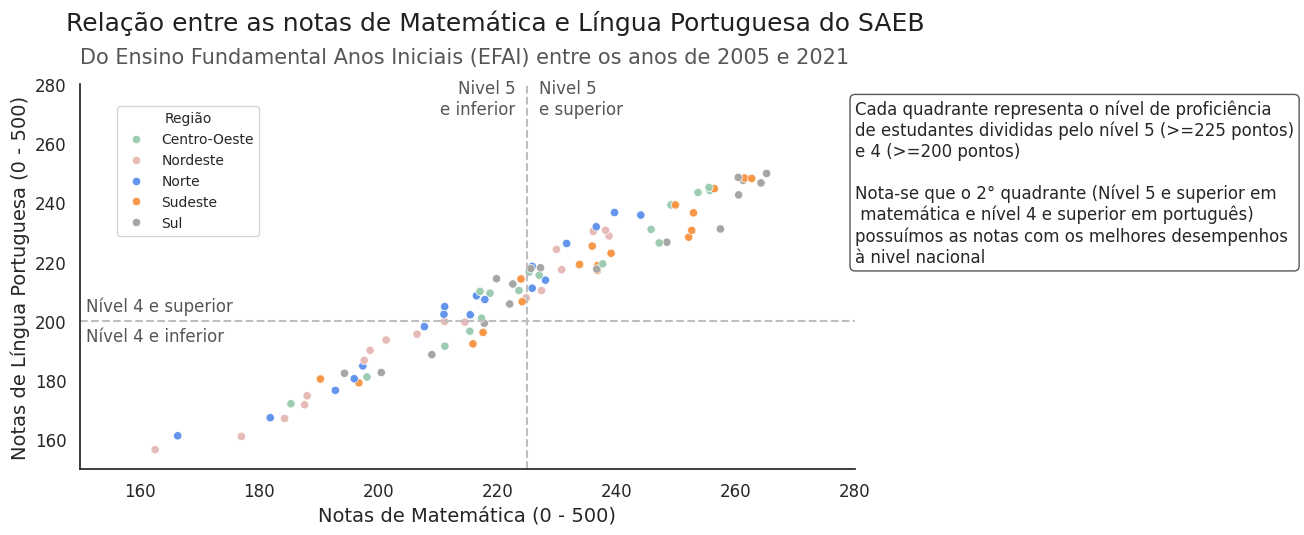

In [ ]:
# Gerando o gráfico

# Definindo as cores do gráfico
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

# Área do gráfico e tema de visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

# Gerando o gráfico de dispersão com cores como categoria
ax = sns.scatterplot(data=ideb_efai, x='nota_saeb_matematica', y='nota_saeb_lingua_portuguesa',
                     hue='regiao', palette=cores)

# Personalizando o gráfico
plt.suptitle('Relação entre as notas de Matemática e Língua Portuguesa do SAEB', size=18, color=CINZA1,
             ha='right', x=0.97, y=1.03)
plt.title('Do Ensino Fundamental Anos Iniciais (EFAI) entre os anos de 2005 e 2021', fontsize=15, color=CINZA3,
          pad=15, loc='left')
ax.legend(bbox_to_anchor=(155,275), title='Região', title_fontsize=10, fontsize=10, loc='upper left', bbox_transform=ax.transData)
ax.set_xlabel('Notas de Matemática (0 - 500)', fontsize=14)
ax.set_ylabel('Notas de Língua Portuguesa (0 - 500)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.set_xlim(150,280)
ax.yaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.set_ylim(150,280)
sns.despine()

# Limites das notas em no eixo y (notas de português) - 200 pontos (proficiência)
ax.text(ax.get_xlim()[0] + 1, 202, 'Nível 4 e superior', fontsize=12, color=CINZA3, va='bottom')
ax.text(ax.get_xlim()[0] + 1, 198, 'Nível 4 e inferior', fontsize=12, color=CINZA3, va='top')
plt.axhline(y=200, color=CINZA5, linestyle='--')

# Limites das notas em no eixo x (notas de matemática) - 225 pontos (proficiência)
ax.text(223, ax.get_ylim()[1] - 10, 'Nivel 5\ne inferior', fontsize=12, color=CINZA3, ha='right')
ax.text(227, ax.get_ylim()[1] - 10, 'Nivel 5\ne superior', fontsize=12, color=CINZA3, ha='left')
plt.axvline(x=225, color=CINZA5, linestyle='--')

# Adicionando texto explicando a divisão de quadrantes e o que significa
ax.annotate('Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=225 pontos)\ne 4 (>=200 pontos)\n\n'
            'Nota-se que o 2° quadrante (Nível 5 e superior em \n matemática e nível 4 e superior em português)\n'
            'possuímos as notas com os melhores desempenhos \nà nivel nacional', xy=(280,220), xycoords='data',
            bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3),
            xytext=(0,0), textcoords='offset points')

plt.show()

###Questionamento 3

In [ ]:
# Selecionando os dados desejados
ideb_efaf =ideb.query("anos_escolares == 'EFAF'")[['regiao', 'taxa_aprovacao', 'nota_saeb_media_padronizada', 'ideb']]
ideb_efaf = ideb_efaf.reset_index(drop=True)
ideb_efaf.head()

,regiao,taxa_aprovacao,nota_saeb_media_padronizada,ideb
0,Centro-Oeste,72.1,4.356453,3.1
1,Centro-Oeste,94.4,5.840183,5.5
2,Nordeste,66.8,3.925063,2.6
3,Nordeste,92.2,5.796700,5.3
4,Norte,75.3,4.097388,3.1


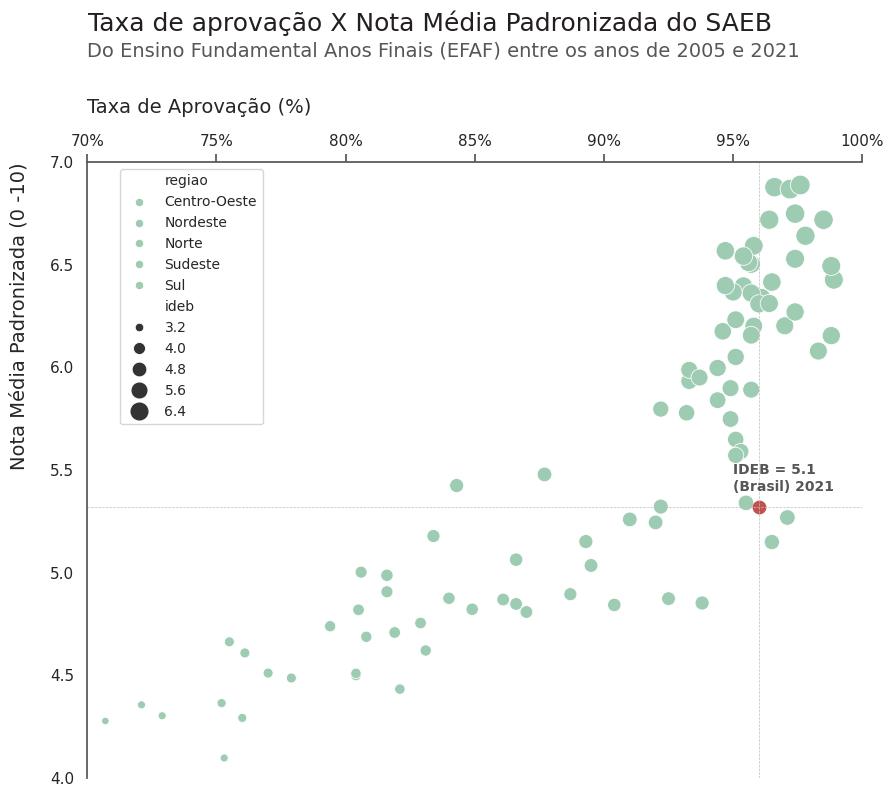

In [ ]:
# Gerando o gráfico
fig, ax = plt.subplots(figsize=(10,8))

# Definindo as cores
cores = [VERDE3, VERDE3, VERDE3, VERDE3, VERDE3]

#Gerando o gráfico de bolhas
ax = sns.scatterplot(data=ideb_efaf, x='taxa_aprovacao', y='nota_saeb_media_padronizada', hue='regiao', size='ideb',
                     sizes=(10,200), palette=cores)

# Adicionando o IDEB nacional (Taxa * Nota Padronizada) - https://download.inep.gov.br/institucional/apresentacao_saeb_ideb_2021.pdf
ax.scatter([96], [5.32], color=VERMELHO1, s=80)
plt.axvline(x=96, color=CINZA5, linestyle='--', linewidth=0.5) # Adicionando linhas de referência do IDEB nacional
plt.axhline(y=5.32, color=CINZA5, linestyle='--', linewidth=0.5) # Adicionando linhas de referência do IDEB nacional
ax.text(95, 5.4, 'IDEB = 5.1\n(Brasil) 2021', color=CINZA3, fontsize=10, fontweight='bold')

# Personalizando o gráfico
plt.suptitle('Taxa de aprovação X Nota Média Padronizada do SAEB', size=18, color=CINZA1, ha='right', x=0.81, y=1.07)
plt.title('Do Ensino Fundamental Anos Finais (EFAF) entre os anos de 2005 e 2021', fontsize=14, color=CINZA3, pad=30, loc='left')
ax.legend(bbox_to_anchor=(71,7), fontsize=10, loc='upper left', bbox_transform=ax.transData)
ax.xaxis.set_tick_params(labelsize=11, color=CINZA3)
ax.yaxis.set_tick_params(labelsize=11, color=CINZA3)
ax.set_xlim(70,100)
ax.set_ylim(4,7)

# Propriedades dos eixos x e y
xticks = np.arange(70, 105, 5)
yticks = np.arange(4, 7.5, 0.5)
plt.setp(ax, xticks=xticks, xticklabels=[str(i)+'%' for i in xticks], yticks=yticks)

# Ajustando a aparência dos ticks e tick labels
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Taxa de Aprovação (%)', fontsize=14, loc='left', labelpad=15)
ax.set_ylabel('Nota Média Padronizada (0 -10)', fontsize=14, loc='top', labelpad=15)

#Removendo bordas da direita e base e alterando as cores da borda esquerda e do top
ax.spines[['right', 'bottom']].set_visible(False)
ax.spines[['left', 'top']].set_color(CINZA3)

fig.show()